# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Zaina Abushaban


In [136]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

* Checking for missing values:

In [137]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [138]:
housing_df.dropna(inplace=True)
print(housing_df.isnull().sum())
no_nulls=housing_df.copy()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


* Visualize the features with any relevant plots to understand the distribution of data

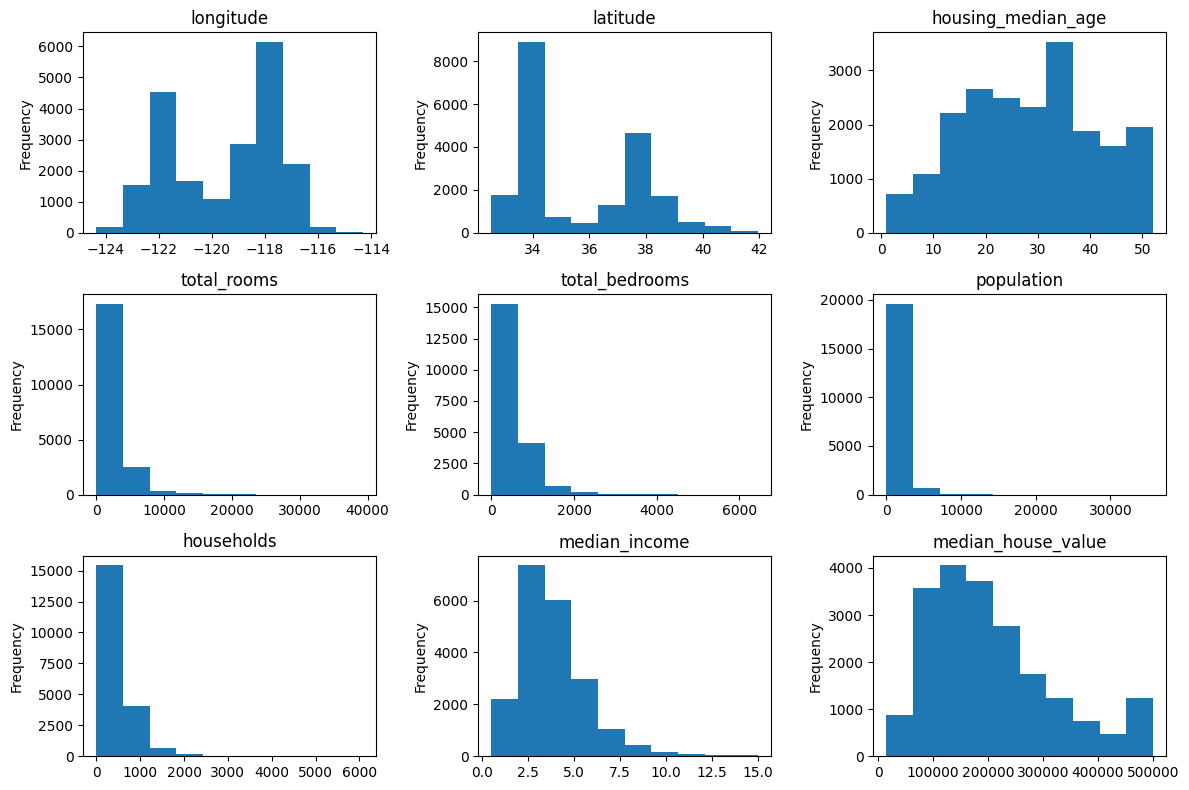

In [139]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

#We need to make sure the type is numerical as to disclude ocean proximity:
for i, col in enumerate(housing_df.select_dtypes(include='number')):
    housing_df[col].plot(kind='hist', ax=axes[i])
    #Set the title as the column name for each plot:
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

This just gives us a general sense of where the data points lie.

* Visualize the target variable with respect to the features 


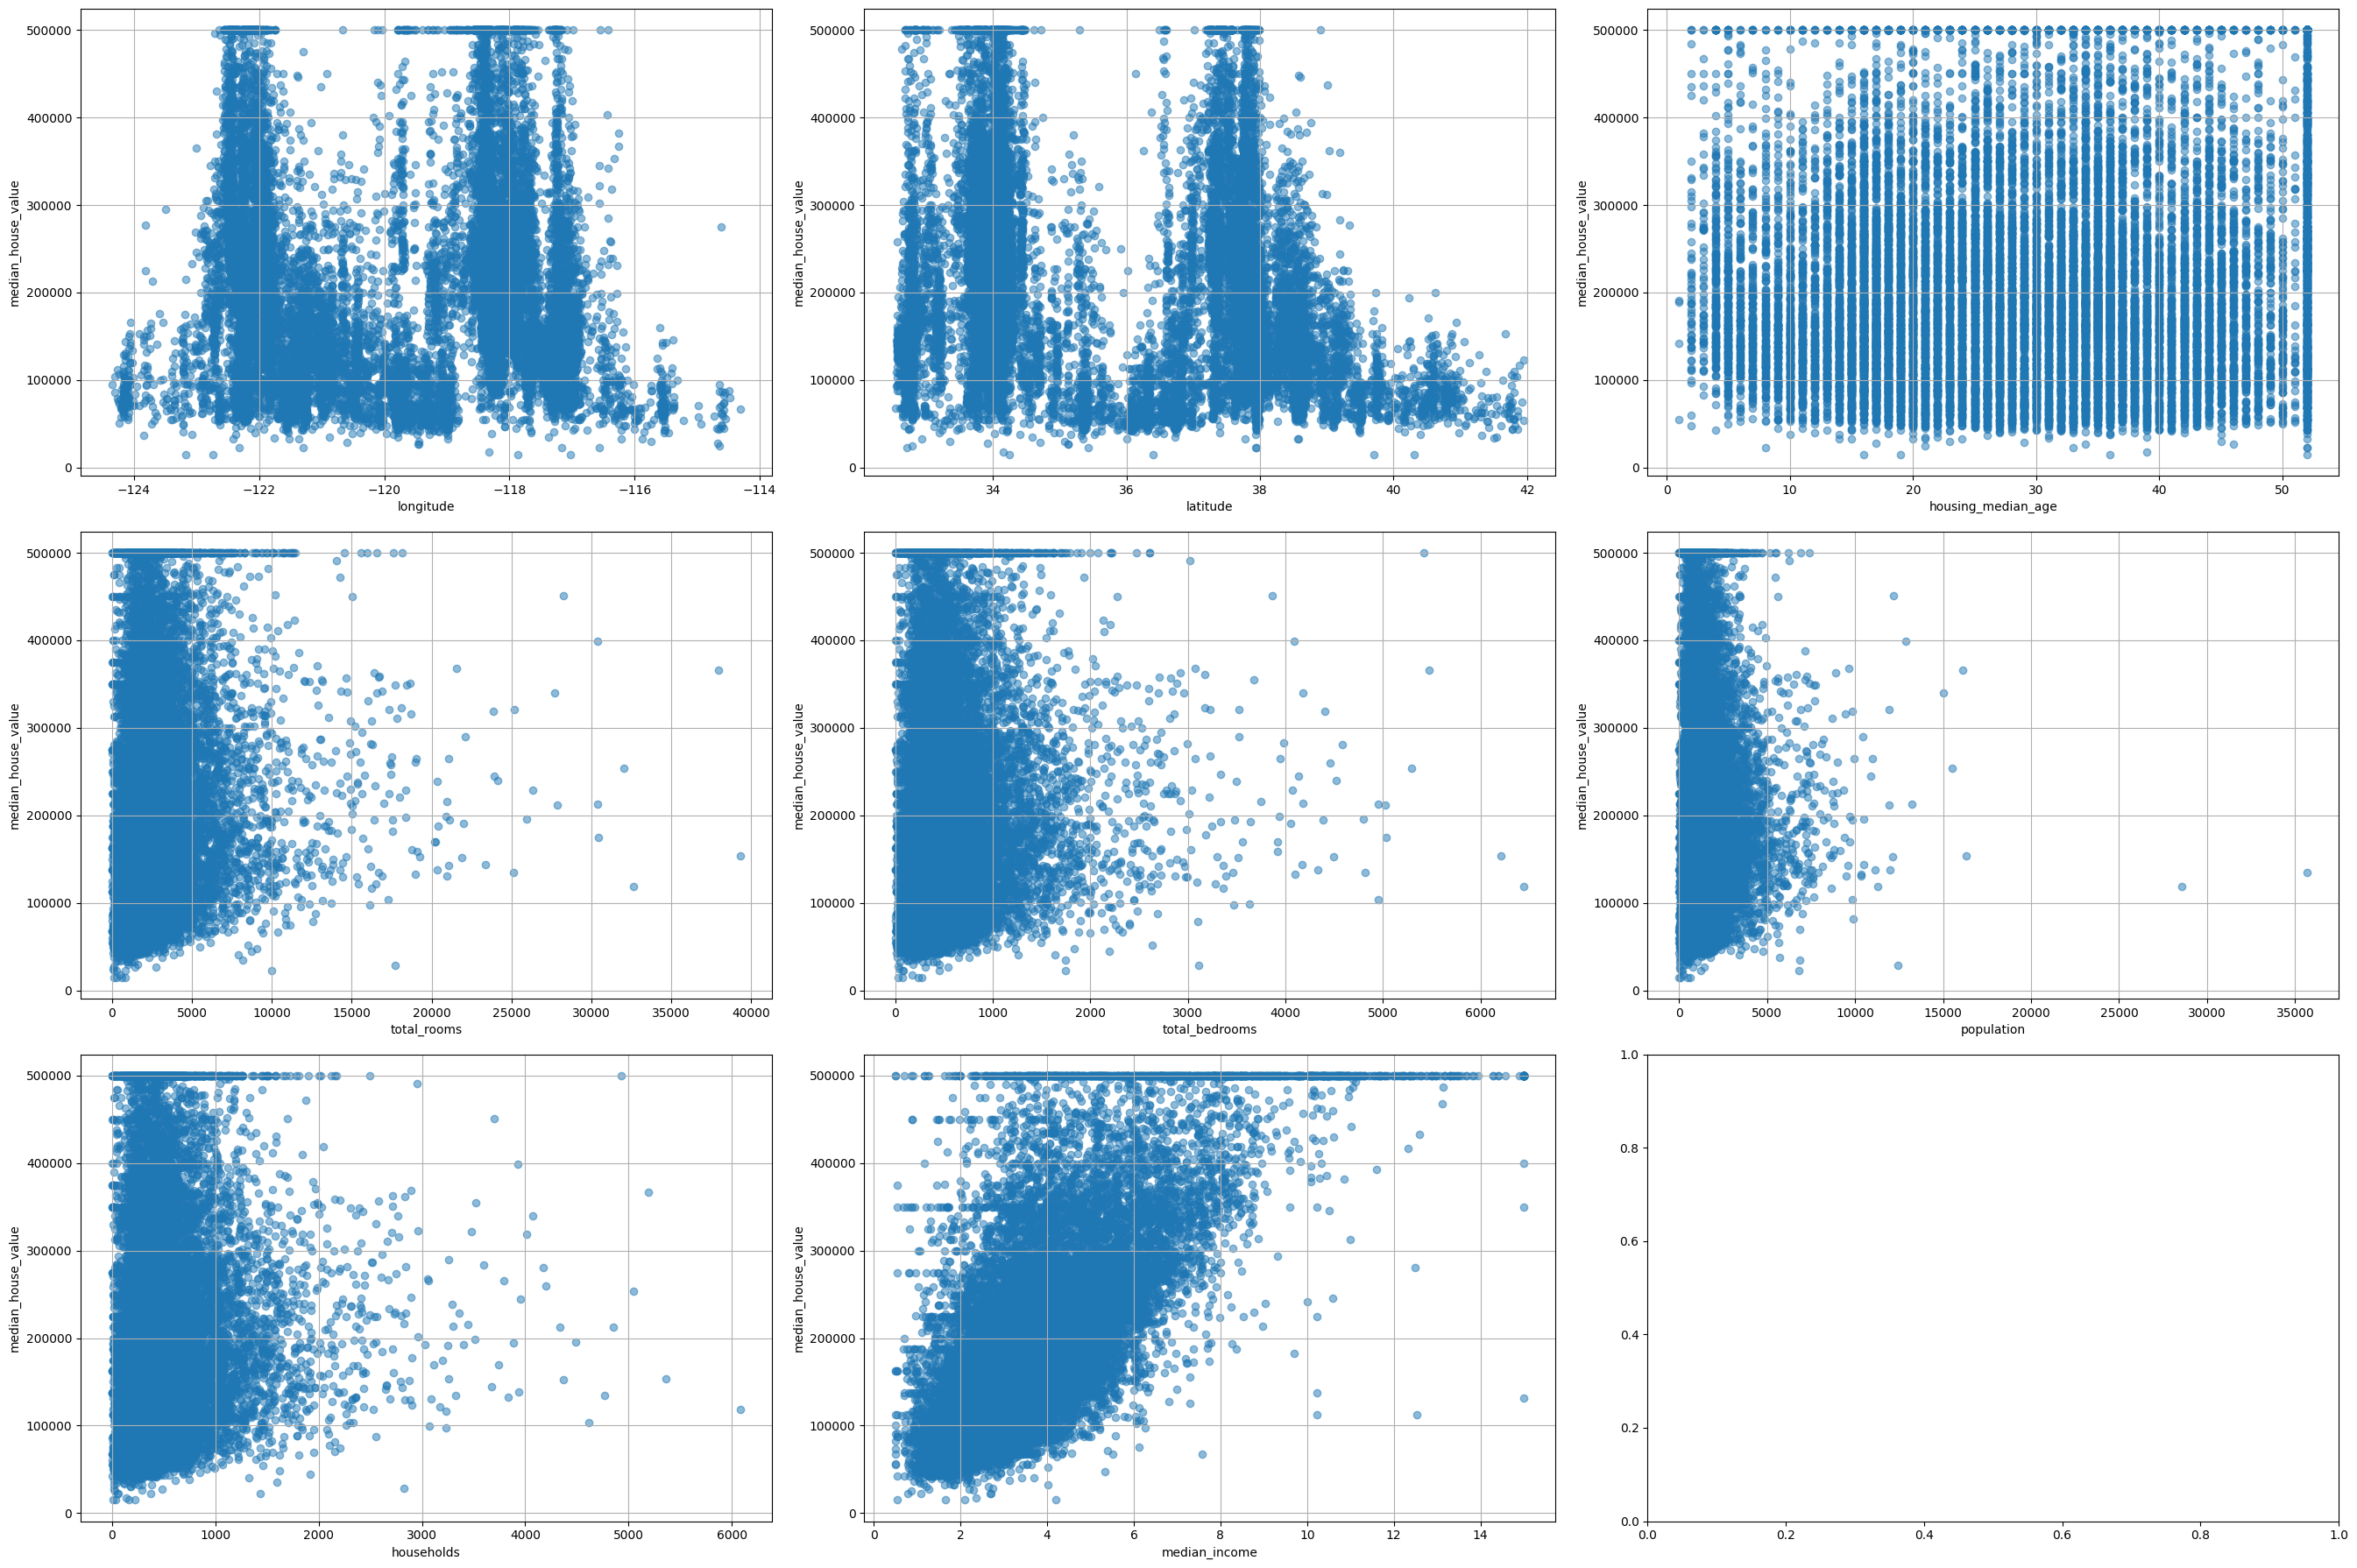

In [140]:
target = 'median_house_value'
plot_size = (9, 6)

fig, axes = plt.subplots(3, 3, figsize=(27, 18))

axes = axes.flatten()

#Iterating with both i and column
#Because i will be used to determine which graph it should use:
for i, column in enumerate(housing_df.columns):
    if column != target :
        ax = axes[i]
        ax.scatter(housing_df[column], housing_df[target], alpha=0.5)
        ax.set_xlabel(column)
        ax.set_ylabel(target)
        ax.grid(True)
    else:
        break 
plt.tight_layout()
plt.show()

- Here we don't really notice any strong correlations, except for maybe the median income, which has a noticable positive correlation with the median house value.
- Also, in the longtitude and latitude graphs, there is a gap in which there aren't many data points, or the house values are really low, this could be correlated with some kind of dangerous area or maybe it's far away from the city and people's work and study places.
- In the last graph there isn't anything to plot, since ocean proximity is categorical data, we could assign numerical values and then plot those if we wanted to see the distribution here.

* Visualize the correlation between the features using a heatmap

# Add a legend in the heat map

/var/folders/9r/709f9hv15p1fs41s6_994hmc0000gn/T/ipykernel_6440/3087604742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(housing_df.corr(), cbar=False)
/var/folders/9r/709f9hv15p1fs41s6_994hmc0000gn/T/ipykernel_6440/3087604742.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in range(len(housing_df.corr().index)):
/var/folders/9r/709f9hv15p1fs41s6_994hmc0000gn/T/ipykernel_6440/3087604742.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f

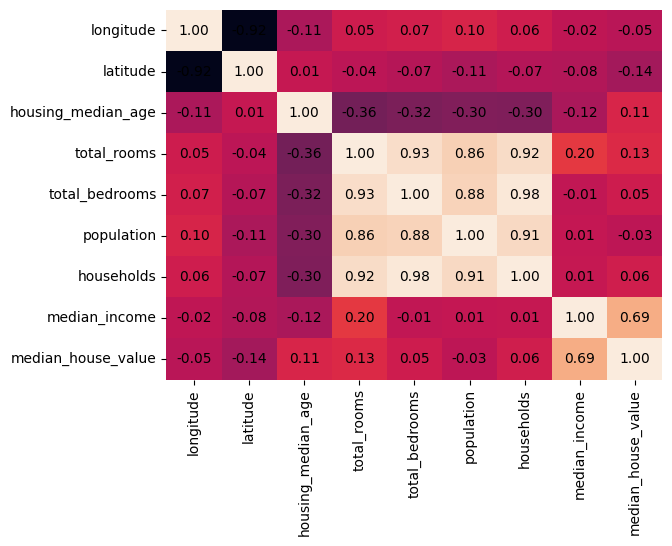

In [141]:
heatmap = sns.heatmap(housing_df.corr(), cbar=False)

for i in range(len(housing_df.corr().index)):
    for j in range(len(housing_df.corr().columns)):
        text = '{:.2f}'.format(housing_df.corr().iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center')

plt.show()

First thing we notice is the diagonal is always one, because any feature should have a positive 1 correlation factor with itself.
Second we notice this square of high correlations in the middle of the heatmap, which indicated a high correlation between total bedrooms, populatio, households, and total rooms.
Now focusing on out target value: The median value:
The only notably high correlation is with the median income, which we already took note of from the scatter plot above.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

I'm going to use the IQR range method, then find the upper and lower borders, if they surpass either (OR), then they are an outlier.

I chose this way because it is one of the most common and simple ways to find outliers in a dataset.

In [142]:
numeric_cols = housing_df.select_dtypes(include=np.number).columns.drop("median_house_value")
numeric_housing_df = housing_df[numeric_cols]

#Now we iterate over each numerical column to find the 
for col in numeric_cols:
    Q1 = numeric_housing_df[col].quantile(0.25)
    Q3 = numeric_housing_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_condition_col = (numeric_housing_df[col] < lower_bound) | (numeric_housing_df[col] > upper_bound)
    numeric_housing_df.loc[outliers_condition_col, col] = np.nan

#Now for the ocean proximity, I will use frequency analysis, and choose the proximity that is least likely to show
#up as an outlier:
ocean_proximity_counts = housing_df['ocean_proximity'].value_counts()
total_rows = len(housing_df)
outliers_ocean = ocean_proximity_counts[(ocean_proximity_counts / total_rows )< 0.1 ].index
outlier_category = housing_df[housing_df['ocean_proximity'].isin(outliers_ocean)]
housing_df.loc[housing_df['ocean_proximity'].isin(outliers_ocean), 'ocean_proximity'] = np.nan

# Combine the cleaned numeric dataset, and the cleaned ocean proximity dataset, to get a final cleaned dataset:
cleaned = pd.concat([numeric_housing_df, housing_df], axis=1)


#To check:
cleaned.isnull().sum()

/var/folders/9r/709f9hv15p1fs41s6_994hmc0000gn/T/ipykernel_6440/906621416.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_housing_df.loc[outliers_condition_col, col] = np.nan


longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          5
dtype: int64

A lot of the fields don't seem to have any outliers so they stay the same.

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

Checkpoint Function that we used in lab 5:

In [143]:
def checkpoint(dataframe, filename):
    dataframe.to_csv(f"{filename}.csv", index=False)
    print(f"Checkpoint '{filename}' created.")


1) The data set as is:

In [144]:
checkpoint(cleaned, "null_for_outliers")

Checkpoint 'null_for_outliers' created.


2) Outlier Removal:

In [145]:
outliers_removed =  cleaned.copy()
outliers_removed.dropna(inplace=True)
checkpoint(outliers_removed,"outliers_removed")
#just to make sure
outliers_removed.info()

Checkpoint 'outliers_removed' created.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17989 entries, 2 to 20639
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17989 non-null  float64
 1   latitude            17989 non-null  float64
 2   housing_median_age  17989 non-null  float64
 3   total_rooms         17989 non-null  float64
 4   total_bedrooms      17989 non-null  float64
 5   population          17989 non-null  float64
 6   households          17989 non-null  float64
 7   median_income       17989 non-null  float64
 8   longitude           17989 non-null  float64
 9   latitude            17989 non-null  float64
 10  housing_median_age  17989 non-null  float64
 11  total_rooms         17989 non-null  float64
 12  total_bedrooms      17989 non-null  float64
 13  population          17989 non-null  float64
 14  households          17989 non-null  float64
 15  median_income 

3) Mean imputaition, with mode imputation for categorical values:

In [146]:
numeric_cols = housing_df.select_dtypes(include=np.number).columns.drop("median_house_value")
categorical_cols = cleaned.select_dtypes(exclude=np.number).columns

mean_imputed = cleaned.copy()

# Fill null values in numerical columns with the respective column's mean
for col in numeric_cols:
    mean_val = mean_imputed[col].mean()
    mean_imputed[col] = np.where(pd.isnull(mean_imputed[col]), mean_val, mean_imputed[col])
# Fill null values in categorical columns with the mode value
for col in categorical_cols:
    mode = mean_imputed[col].mode()
    mode_value = mode[0]  # Taking the first mode value if multiple
    mean_imputed[col].fillna(mode_value, inplace=True)

checkpoint(mean_imputed, "mean_imputed")
mean_imputed.isnull().sum()

Checkpoint 'mean_imputed' created.


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

All of them are now non-null, so we know it worked.

4) Medain imputaition, with mode imputation for categorical values:


In [147]:
numeric_cols = housing_df.select_dtypes(include=np.number).columns.drop("median_house_value")
categorical_cols = cleaned.select_dtypes(exclude=np.number).columns

median_imputed = cleaned.copy()

# Fill null values in numerical columns with the respective column's median
for col in numeric_cols:
    median_val = median_imputed[col].median()
    median_imputed[col] = np.where(pd.isnull(median_imputed[col]), median_val, median_imputed[col])
# Fill null values in categorical columns with the mode value
for col in categorical_cols:
    mode = median_imputed[col].mode()
    mode_value = mode[0] 
    median_imputed[col].fillna(mode_value, inplace=True)


checkpoint(median_imputed, "median_imputed")
median_imputed.isnull().sum()

Checkpoint 'median_imputed' created.


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [148]:
from sklearn.preprocessing import OrdinalEncoder
dataframes=[no_nulls,outliers_removed,mean_imputed,median_imputed]
for df in dataframes:
    encoder = OrdinalEncoder()
    data = df[['ocean_proximity']]
    encoded_data = encoder.fit_transform(data)
    df['ocean_proximity']=encoded_data


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [149]:
import random
def split_df(dataframe):
    data_rows = dataframe.values.tolist()

    random.shuffle(data_rows)

    train_val = 0.7
    split = int(len(data_rows) * train_val)

    train_data = data_rows[:split]
    test_data = data_rows[split:]

    train_df = pd.DataFrame(train_data, columns=dataframe.columns)
    test_df = pd.DataFrame(test_data, columns=dataframe.columns)

    return train_df, test_df

#I'm gonna use mean imputed data to test the function:
train_df, test_df = split_df(mean_imputed)
print(test_df.shape)
print(train_df.shape)


(6130, 18)
(14303, 18)


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

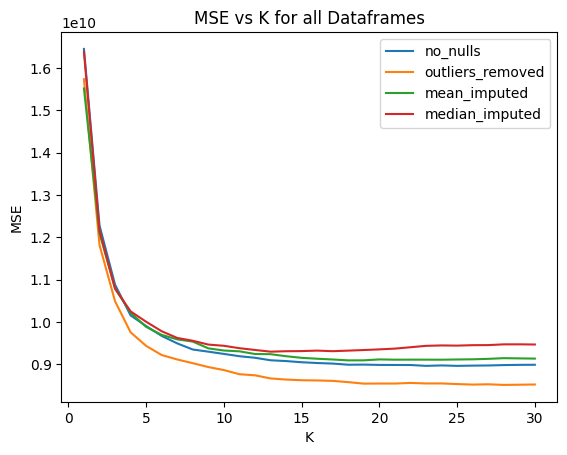

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

dataframes = {
    'no_nulls': no_nulls,
    'outliers_removed': outliers_removed,
    'mean_imputed': mean_imputed,
    'median_imputed': median_imputed
}

target = 'median_house_value'
k_vals = range(1, 31)
mse_values = {df_name: [] for df_name in dataframes}

#For all dataframes:
for df_name, df in dataframes.items():
     # Split the data set:
    train_df, test_df = split_df(df)

    X_train = train_df.drop(columns=[target])
    y_train = train_df[target]

    X_test = test_df.drop(columns=[target])
    y_test = test_df[target]

    mse_dictionary = {}
    for k in k_vals:
        knn_regressor = KNeighborsRegressor(n_neighbors=k)
        knn_regressor.fit(X_train, y_train)
        predictions = knn_regressor.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_dictionary[k] = mse
        mse_values[df_name].append(mse)


for df_name, mse_list in mse_values.items():
    plt.plot(list(k_vals), mse_list, label=df_name)

plt.xlabel('K')
plt.ylabel('MSE')
plt.title('MSE vs K for all Dataframes')
plt.legend()
plt.show()



The lowest MSE for datasets is with outliers removed and it looks like the best K value for that dataset (at the elbow point) is 5.
I expect that since the dataset is very small, the difference between the number of values in the no null dataset, and the imputed datasets isn't that different, so it wasn't much of a problem that it had less data points, but the fact that it had accurate original data was probably the reason it had the lowest MSEs for most of the K values, I think if we had a bigger dataset the median imputed might have done better in terms of MSE.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataframes = {
    'no_nulls': no_nulls,
    'outliers_removed': outliers_removed,
    'mean_imputed': mean_imputed,
    'median_imputed': median_imputed
}
for df_name, df in dataframes.items():
    train_df, test_df = split_df(df)

    X_train = train_df.drop(columns=[target])
    y_train = train_df[target]

    X_test = test_df.drop(columns=[target])
    y_test = test_df[target]

    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)
    predictions = linear_regressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    
    print(df_name + ': ' + str(mse))


no_nulls: 5157845780.2559
outliers_removed: 4295557226.81763
mean_imputed: 4540578622.665754
median_imputed: 4592951735.955669


## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

We found that the values in the KNN regression for MSE were mostly upward of 1 to the tenth power, meanwhile for the linear regression the values were to the 9th power, which signifies a major difference, and it is clear that linear regression has better results.
I think the linear regression worked because of how small the dataset is, since the model assumes a linear relationship between the target and the predictors, it is less prone to overfitting.
Also, KNN is much more sensitive to noise in smaller datasets, linear regression might be more robust to such issues.
KNN considers the local relationships between instances, whereas linear regression models capture global relationships between features and the target variable. Since we noticed there isn't a lot of correlations between the features seperately, then it is probably better to take a look in the global scope, and see how the data as a whole affect eachother.


# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices